### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm

### Uppgift 0 - uppvärmning med riket
I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn
  - a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
       respektive dataframe så du får något liknande som nedan.
  - b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.
  - c) Rita ett stapeldiagram på totala poängen för de olika ämnena.
  - d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
  - e) Rita ett stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  - a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


In [1]:
# A)
import pandas as pd

# Läser in filen och alla olika sheets
df_riks_2023 = pd.read_excel("../Labb2/data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)

sheets_to_change = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk", "Rapportbeskrivning och def."]

# Funktion för att ändra kolumnnamnen i alla sheets
def change_columns(df):
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"][:len(df.columns)]
    return df

# Loopar genom varje sheet och ändrar kolumnnamnen om sheetet finns med i sheets_to_change
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

df_riks_2023['Engelska']


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [2]:
# Testar så jag kan skriva ut mer än första sheetet
df_math = df_riks_2023["Matematik"]

df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [3]:
# B)

# Totalt antal flickor som fått F i matematik
flickor_F = (pd.to_numeric(df_riks_2023["Matematik"]['Flickor (A-F)']) * 0.113)
print("Totalt antal flickor som fått F:", round(flickor_F[0]))

# Totalt antal killar som fått F i matematik
killar_F = (pd.to_numeric(df_riks_2023["Matematik"]['Pojkar (A-F)']) * 0.105)
print("Totalt antal killar som fått F:", round(killar_F[0]))


Totalt antal flickor som fått F: 5825
Totalt antal killar som fått F: 5798


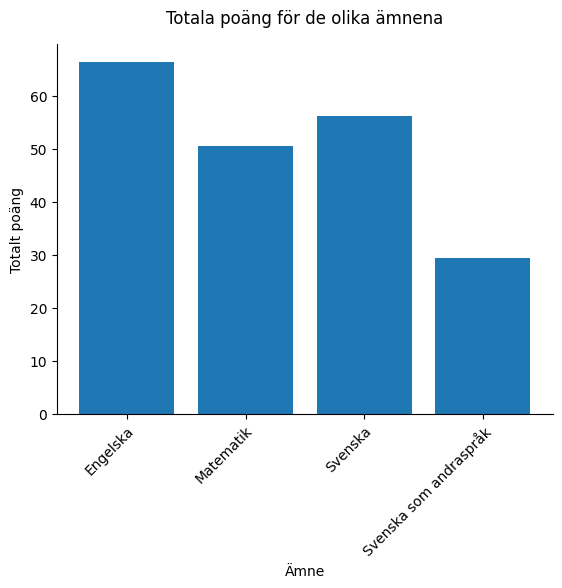

In [4]:
# C)

import matplotlib.pyplot as plt

# Loopar genom varje sheet och ändrar kolumnnamnen precis som ovan
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

# Skapar en DataFrame med de totala poängen för varje ämne
df_total_points = pd.DataFrame([
    {'Ämne': sheet_name, 'Totalt poäng': pd.to_numeric(df['Totalt (poäng)'], errors='coerce').sum(axis=0)}
    for sheet_name, df in df_riks_2023.items() if sheet_name in sheets_to_change and 'Totalt (poäng)' in df.columns
])

# Rensar bort eventuella NaN-värden
df_total_points.dropna(inplace=True)

# Ritar upp ett stapeldiagram
fig, ax = plt.subplots()
ax.bar(df_total_points['Ämne'], df_total_points['Totalt poäng'])
ax.set_title('Totala poäng för de olika ämnena', pad=15)
ax.set_xlabel('Ämne')
ax.set_ylabel('Totalt poäng')

# Tar bort översta och högra axel-linjen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ändrar etiketterna på x axeln så de får plats
plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=10)

plt.show()


C:\Users\Sandra\AppData\Local\Temp\ipykernel_27232\3478550390.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_total_points = pd.concat([df_total_points, pd.DataFrame({'Huvudman': [huvudman], 'Ämne': [sheet_name], 'Totalt poäng': [total_points]})])
C:\Users\Sandra\AppData\Local\Temp\ipykernel_27232\3478550390.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(group['Ämne'], rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
C:\Users\Sandra\AppData\Local\Temp\ipykernel_27232\3478550390.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

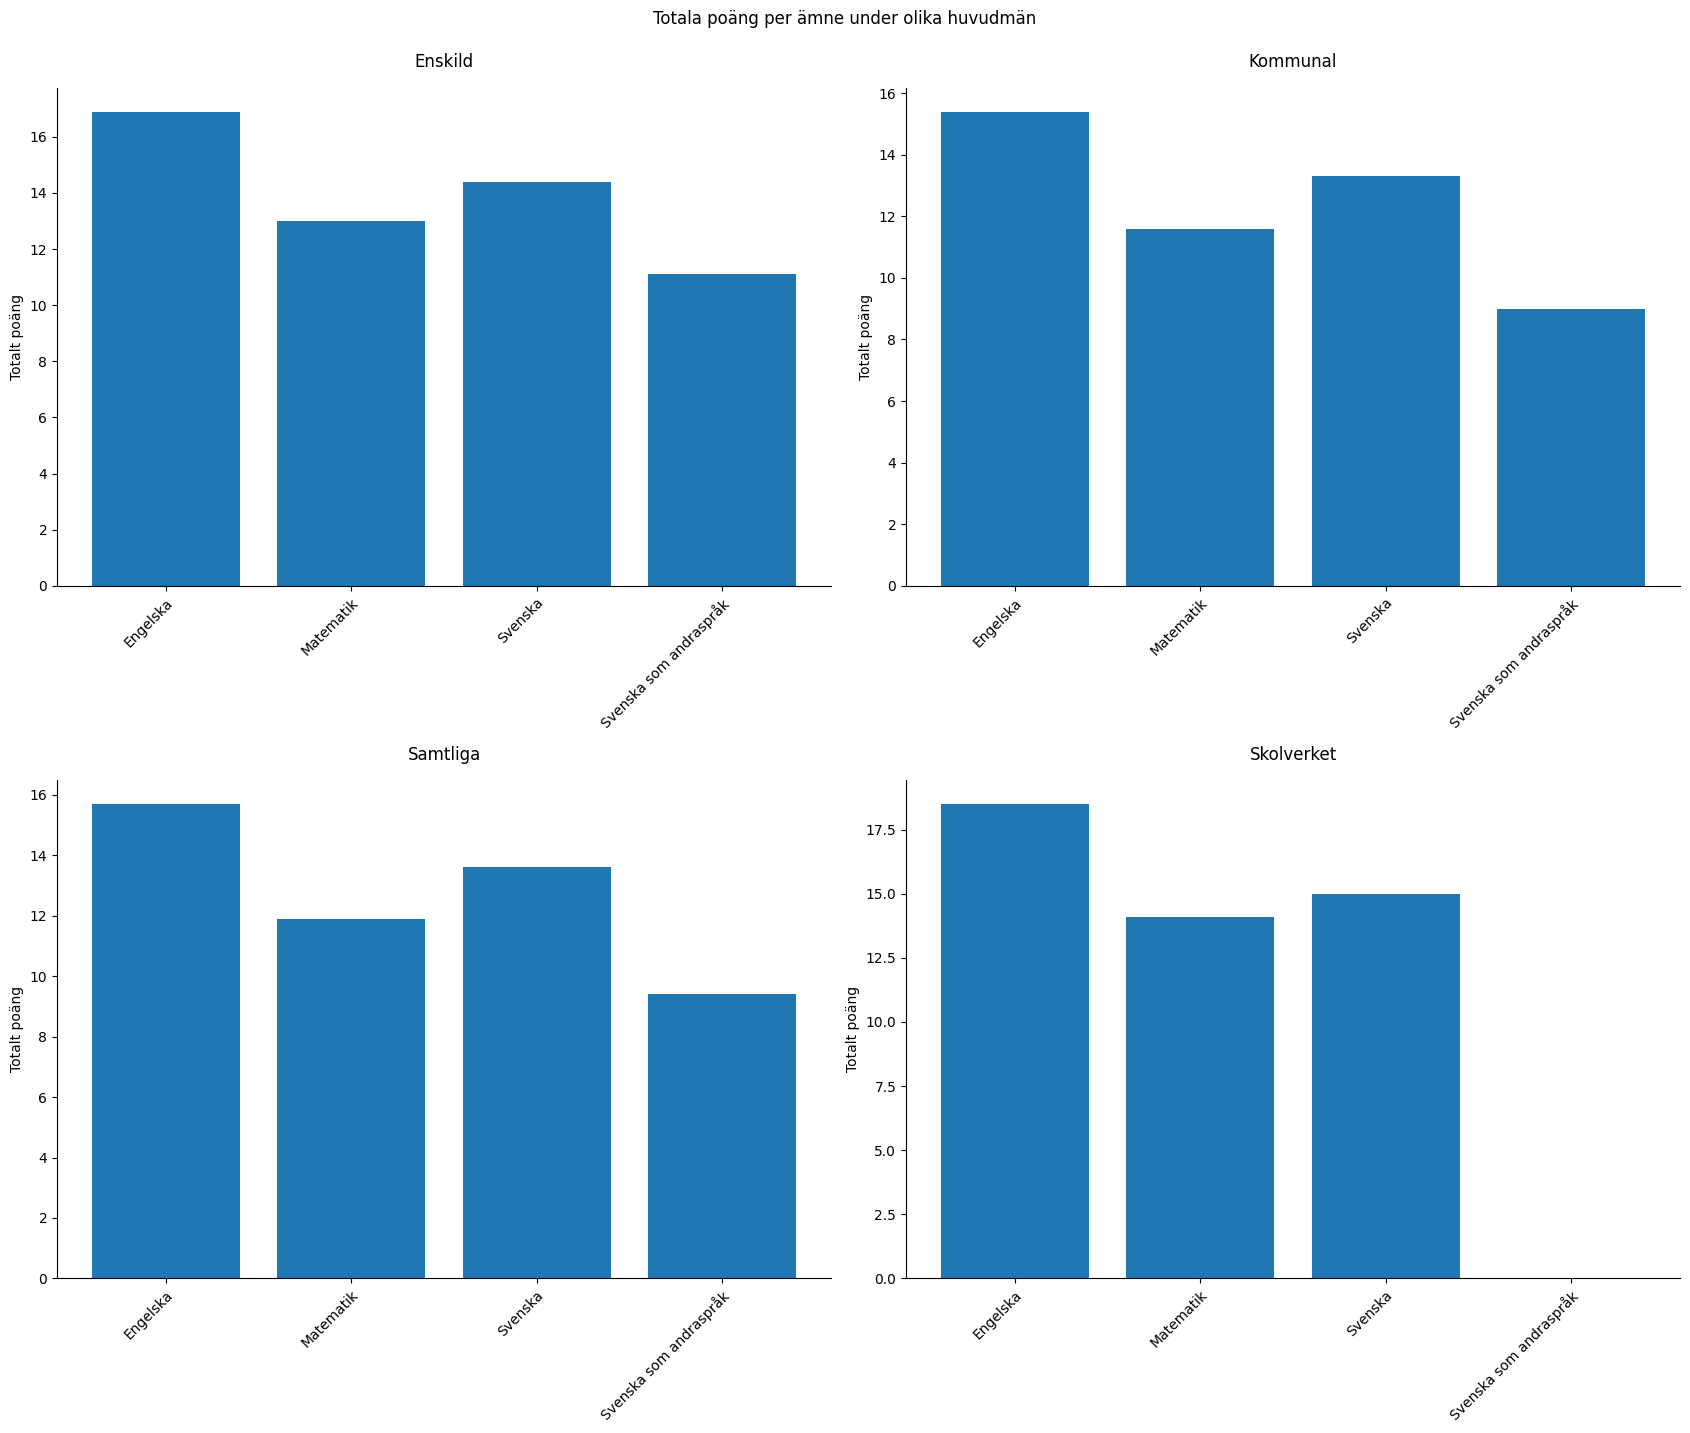

In [5]:
# D)

import matplotlib.pyplot as plt

for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

df_total_points = pd.DataFrame(columns=['Huvudman', 'Ämne', 'Totalt poäng'])

# Loopar genom varje sheet och hämtar den totala poängen för varje ämne och "huvudman"
for sheet_name in sheets_to_change:
    for huvudman in df_riks_2023[sheet_name]['Huvudman'].unique():
        if 'Totalt (poäng)' in df_riks_2023[sheet_name].columns:
            total_points = pd.to_numeric(df_riks_2023[sheet_name][df_riks_2023[sheet_name]['Huvudman'] == huvudman]['Totalt (poäng)'], errors='coerce').sum(axis=0)
            df_total_points = pd.concat([df_total_points, pd.DataFrame({'Huvudman': [huvudman], 'Ämne': [sheet_name], 'Totalt poäng': [total_points]})])

# Rensar bort eventuella NaN-värden
df_total_points.dropna(inplace=True)

# Skapar subplots och korrigerar storlek på "graf"
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17, 14))

# Loopar genom varje "huvudman" och ritar ett stapeldiagram i respektive subplot-graf
for i, (huvudman, group) in enumerate(df_total_points.groupby('Huvudman')):
    ax = axs[i // 2, i % 2] 
    ax.bar(group['Ämne'], group['Totalt poäng'])
    ax.set_title(f"{huvudman}", pad=15)
    ax.set_ylabel('Totalt poäng')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Justerar x-label
    ax.set_xticklabels(group['Ämne'], rotation=45, ha="right", rotation_mode="anchor", fontsize=10)

# Justerar layouten för att undvika överlappning
plt.tight_layout()
plt.suptitle("Totala poäng per ämne under olika huvudmän", y=1.02)
plt.show()


### Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  - a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.
  - b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.
  - c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer

In [6]:
#A )

import pandas as pd

# Läser in data från båda tabellerna i betyg och prov dokumentet
df_grades_1A = pd.read_excel("../Labb2/data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")
df_grades_1B = pd.read_excel("../Labb2/data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

# Läser in rad 9-14 och 7-12 i respektive tabell. 
data_1A = df_grades_1A.iloc[9:14]
data_1B = df_grades_1B.iloc[7:12]

# Döper om kolumnerna
a_columns = [
    "Läsår",
    "Totalt som avslutat åk 9",
    "Totalt som avslutat åk 9: Flickor",
    "Totalt som avslutat åk 9: Pojkar",
    "Elever med slutbetyg: Totalt",
    "Elever med slutbetyg: Flickor",
    "Elever med slutbetyg: Pojkar",
    "Godkända slutbetyg: Totalt",
    "Godkända slutbetyg: Flickor",
    "Godkända slutbetyg: Pojkar"
]

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen: Totalt",
    "Medelvärde 16 ämnen: Flickor",
    "Medelvärde 16 ämnen: Pojkar",
    "Medelvärde 17 ämnen: Totalt",
    "Medelvärde 17 ämnen: Flickor",
    "Medelvärde 17 ämnen: Pojkar",
    "% Som saknar godkänt: Totalt",
    "% Som saknar godkänt: Flickor",
    "% Som saknar godkänt: Pojkar"
]

data_1A.columns = a_columns
data_1B.columns = b_columns

display(data_1A)
display(data_1B)

,Läsår,Totalt som avslutat åk 9,Totalt som avslutat åk 9: Flickor,Totalt som avslutat åk 9: Pojkar,Elever med slutbetyg: Totalt,Elever med slutbetyg: Flickor,Elever med slutbetyg: Pojkar,Godkända slutbetyg: Totalt,Godkända slutbetyg: Flickor,Godkända slutbetyg: Pojkar
9,2018/19,112731,54667,58064,112280,54430,57850,110663,53757,56906
10,2019/20,115023,55670,59353,114444,55389,59055,112728,54711,58017
11,2020/21,116359,56715,59644,115710,56394,59316,114136,55721,58415
12,2021/22,120525,58513,62012,119891,58207,61684,117935,57312,60623
13,2022/23,121369,59043,62326,120742,58703,62039,118736,57781,60955


,Läsår,Medelvärde 16 ämnen: Totalt,Medelvärde 16 ämnen: Flickor,Medelvärde 16 ämnen: Pojkar,Medelvärde 17 ämnen: Totalt,Medelvärde 17 ämnen: Flickor,Medelvärde 17 ämnen: Pojkar,% Som saknar godkänt: Totalt,% Som saknar godkänt: Flickor,% Som saknar godkänt: Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


In [7]:
# A) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
#flickor och pojkar i samma graf.

# Totalt antal som fått F i respektive "avdelning"
Total_F = (data_1A['Totalt som avslutat åk 9'] - data_1A["Godkända slutbetyg: Totalt"])
print("Totalt antal som saknar godkänt:\n", round(Total_F))

Flickor_F_grade = (data_1A['Totalt som avslutat åk 9: Flickor'] - data_1A["Godkända slutbetyg: Flickor"])
print("Totalt antal flickor som saknar godkänt:\n", round(Flickor_F_grade))

Pojkar_F_grade = (data_1A['Totalt som avslutat åk 9: Pojkar'] - data_1A["Godkända slutbetyg: Pojkar"])
print("Totalt antal pojkar som saknar godkänt:\n", round(Pojkar_F_grade))



Totalt antal som saknar godkänt:
 9     2068
10    2295
11    2223
12    2590
13    2633
dtype: object
Totalt antal flickor som saknar godkänt:
 9      910
10     959
11     994
12    1201
13    1262
dtype: object
Totalt antal pojkar som saknar godkänt:
 9     1158
10    1336
11    1229
12    1389
13    1371
dtype: object


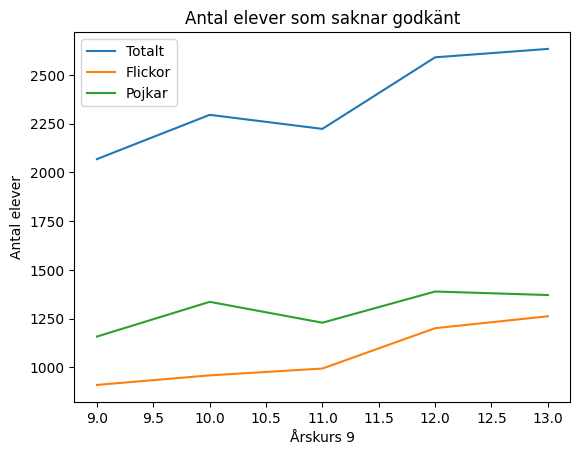

In [8]:
# A)

# Beräknar antal elever som saknar godkänt eller slutbetyg
Total_F = (data_1A['Totalt som avslutat åk 9'] - data_1A["Godkända slutbetyg: Totalt"])
Flickor_F_grade = (data_1A['Totalt som avslutat åk 9: Flickor'] - data_1A["Godkända slutbetyg: Flickor"])
Pojkar_F_grade = (data_1A['Totalt som avslutat åk 9: Pojkar'] - data_1A["Godkända slutbetyg: Pojkar"])

# Ritar upp linjediagramet
plt.plot(Total_F, label='Totalt')
plt.plot(Flickor_F_grade, label='Flickor')
plt.plot(Pojkar_F_grade, label='Pojkar')

# Justerar etiketterna
plt.title('Antal elever som saknar godkänt')
plt.xlabel('Årskurs 9')
plt.ylabel('Antal elever')
plt.legend()

plt.show()


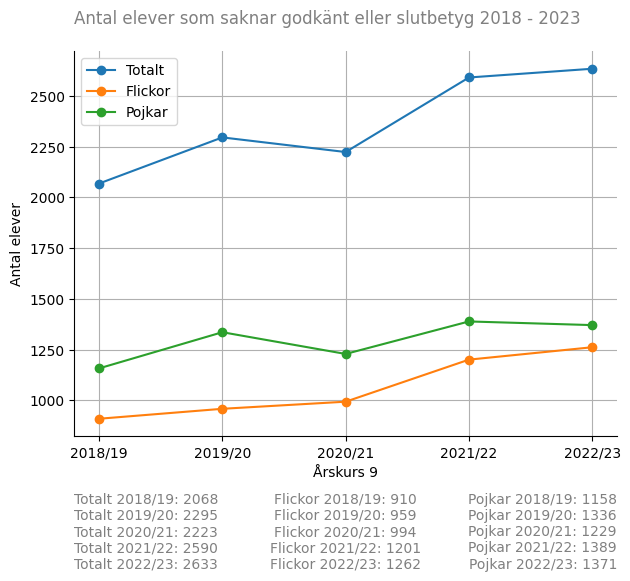

In [9]:
# A)

# Variabel för årskurser
years = data_1A['Läsår']

# Beräknar antal elever som saknar godkänt och slutbetyg, samma som ovan
Total_F = (data_1A['Totalt som avslutat åk 9'] - data_1A["Godkända slutbetyg: Totalt"])
Flickor_F_grade = (data_1A['Totalt som avslutat åk 9: Flickor'] - data_1A["Godkända slutbetyg: Flickor"])
Pojkar_F_grade = (data_1A['Totalt som avslutat åk 9: Pojkar'] - data_1A["Godkända slutbetyg: Pojkar"])

# Skapar subplots och storlek på fig
fig, ax = plt.subplots(figsize=(7, 5))

# Ritar linjediagramet med punkter som markerar varje år
plt.plot(years, Total_F, label='Totalt', marker='o')
plt.plot(years, Flickor_F_grade, label='Flickor', marker='o')
plt.plot(years, Pojkar_F_grade, label='Pojkar', marker='o')

# Justerar etiketterna och skapar luft mellan toppetikett och graf, och vänsterplacerar topptexten
plt.title('Antal elever som saknar godkänt eller slutbetyg 2018 - 2023', pad=20, color="gray", loc="left")
plt.xlabel('Årskurs 9')
plt.ylabel('Antal elever')

# Ger grafen ett rutnät
plt.grid(True)
plt.legend()
'''
# Lägger till summan för varje punkt
for i, year in enumerate(years):
    plt.text(year, Total_F.iloc[i], f'{round(Total_F.iloc[i])}', ha='center', va='bottom', color='gray')
    plt.text(year, Flickor_F_grade.iloc[i], f'{round(Flickor_F_grade.iloc[i])}', ha='center', va='bottom', color='gray')
    plt.text(year, Pojkar_F_grade.iloc[i], f'{round(Pojkar_F_grade.iloc[i])}', ha='center', va='bottom', color='gray')'''

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Lägger till tre listor med år, vem och "summa" under grafen för extra tydlighet
plt.text(0.0, -0.35, '\n'.join([f'Totalt {year}: {round(val)}' for val, year in zip(Total_F, years)]), transform=plt.gca().transAxes, ha='left', va='bottom', color='gray')
plt.text(0.5, -0.35, '\n'.join([f'Flickor {year}: {round(val)}' for val, year in zip(Flickor_F_grade, years)]), transform=plt.gca().transAxes, ha='center', va='bottom', color='gray')
plt.text(1.0, -0.35, '\n'.join([f'Pojkar {year}: {round(val)}' for val, year in zip(Pojkar_F_grade, years)]), transform=plt.gca().transAxes, ha='right', va='bottom', color='gray')

plt.show()


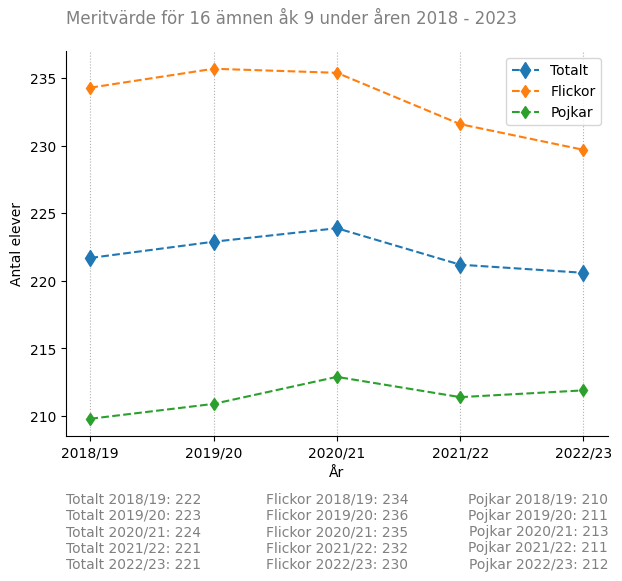

In [10]:
# B) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

# Variabel för årskurser
years = data_1B["Läsår"]

# Beräknar antal elever som saknar godkänt och slutbetyg, samma som ovan
Mean_T = (data_1B["Medelvärde 16 ämnen: Totalt"])
Mean_F = (data_1B["Medelvärde 16 ämnen: Flickor"])
Mean_P = (data_1B["Medelvärde 16 ämnen: Pojkar"])

# Skapar subplots och storlek på fig
fig, ax = plt.subplots(figsize=(7, 5))

# Ritar linjediagramet med punkter som markerar varje år
plt.plot(years, Mean_T, label="Totalt", marker="d", ms=8, ls="--")
plt.plot(years, Mean_F, label="Flickor", marker="d", ls="--")
plt.plot(years, Mean_P, label="Pojkar", marker="d", ls="--")

# Justerar etiketterna och skapar luft mellan toppetikett och graf, och vänsterplacerar topptexten
plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023", pad=20, color="gray", loc="left")
plt.xlabel("År")
plt.ylabel("Antal elever")

# Ger grafen ett rutnät
plt.grid(axis= "x", ls = ':', linewidth = 0.8)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Lägger till tre listor med år, vem och "summa" under grafen för extra tydlighet                 # Get current axis - för text och gör om så man kan ändra dem
plt.text(0.0, -0.35, '\n'.join([f'Totalt {year}: {round(val)}' for val, year in zip(Mean_T, years)]), transform=plt.gca().transAxes, ha='left', va='bottom', color='gray')
plt.text(0.5, -0.35, '\n'.join([f'Flickor {year}: {round(val)}' for val, year in zip(Mean_F, years)]), transform=plt.gca().transAxes, ha='center', va='bottom', color='gray')
plt.text(1.0, -0.35, '\n'.join([f'Pojkar {year}: {round(val)}' for val, year in zip(Mean_P, years)]), transform=plt.gca().transAxes, ha='right', va='bottom', color='gray')

plt.show()


In [11]:
# C)

data_parents = df_grades_1B.iloc[29:32]

# Döper om kolumnerna

b2_columns = [
    "Läsår",
    "Medelvärde 16 ämnen: Totalt",
    "Medelvärde 16 ämnen: Flickor",
    "Medelvärde 16 ämnen: Pojkar",
    "Medelvärde 17 ämnen: Totalt",
    "Medelvärde 17 ämnen: Flickor",
    "Medelvärde 17 ämnen: Pojkar",
    "% Som saknar godkänt: Totalt",
    "% Som saknar godkänt: Flickor",
    "% Som saknar godkänt: Pojkar"
]

data_parents.columns = b2_columns

# Display the DataFrame for reference
data_parents


,Läsår,Medelvärde 16 ämnen: Totalt,Medelvärde 16 ämnen: Flickor,Medelvärde 16 ämnen: Pojkar,Medelvärde 17 ämnen: Totalt,Medelvärde 17 ämnen: Flickor,Medelvärde 17 ämnen: Pojkar,% Som saknar godkänt: Totalt,% Som saknar godkänt: Flickor,% Som saknar godkänt: Pojkar
29,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3,63.5,61.5,65.3
30,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3,37.4,35.2,39.5
31,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6,16.8,16.1,17.5


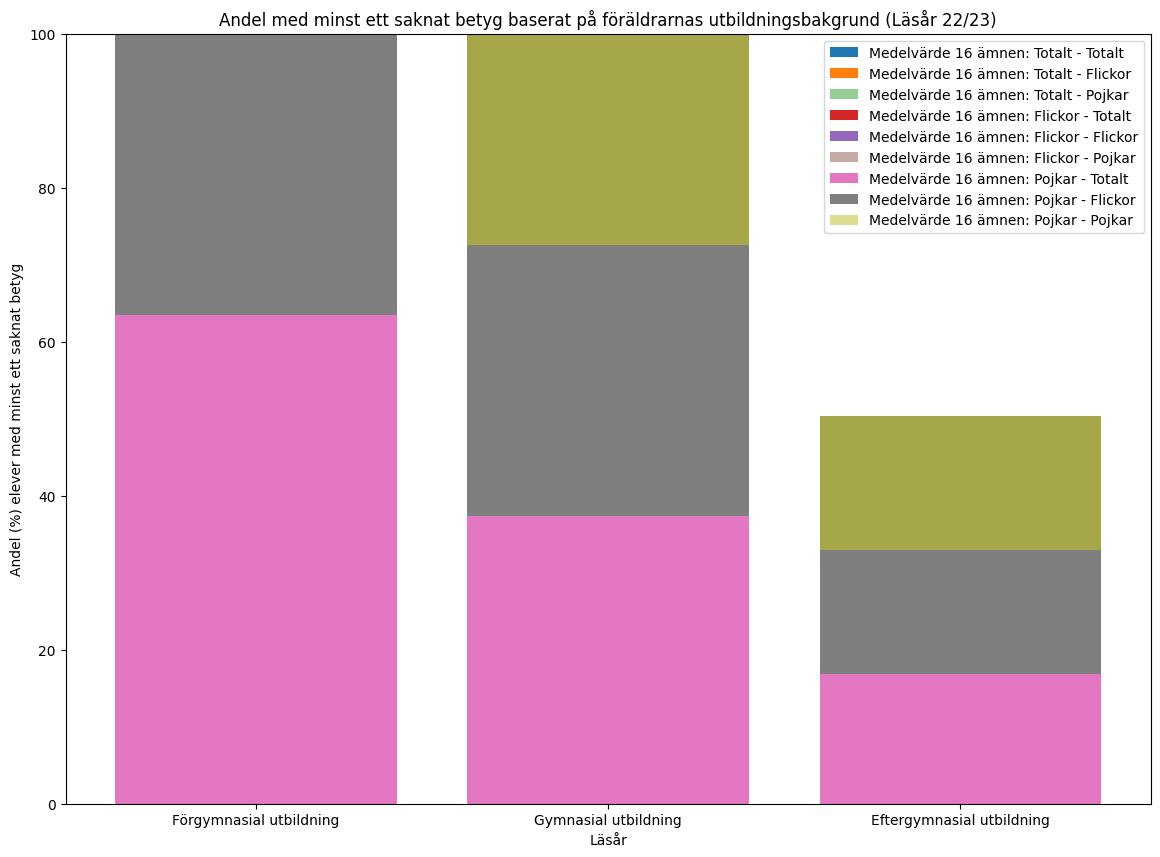

,Plats,Huvudman,Totalt (A-F),Flickor (A-F)
0,Om antalet flickor eller pojkar är färre än 10...,NaN,NaN,NaN
1,Observera att om antalet elever med provbetyg ...,NaN,NaN,NaN
2,Om en andelsuppgift för antingen pojkar eller ...,NaN,NaN,NaN
3,Om data saknas visas en prick (.) istället för...,NaN,NaN,NaN
4,,NaN,NaN,NaN


In [55]:
# C) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
# läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer


# Skapa stapeldiagram för andel med minst ett saknat betyg
fig, ax = plt.subplots(figsize=(14, 10))

# Loopa genom varje utbildningsnivå
for education_level in ["Medelvärde 16 ämnen: Totalt", "Medelvärde 16 ämnen: Flickor", "Medelvärde 16 ämnen: Pojkar"]:
    # Filtrera data baserat på den aktuella utbildningsnivån
    df_education_level = data_parents[data_parents[education_level].notna()]
    # Plotta stapeldiagram för den aktuella utbildningsnivån
    ax.bar(df_education_level["Läsår"], df_education_level["% Som saknar godkänt: Totalt"], label=f'{education_level} - Totalt')
    ax.bar(df_education_level["Läsår"], df_education_level["% Som saknar godkänt: Flickor"], bottom=df_education_level["% Som saknar godkänt: Totalt"], label=f'{education_level} - Flickor')
    ax.bar(df_education_level["Läsår"], df_education_level["% Som saknar godkänt: Pojkar"], bottom=df_education_level["% Som saknar godkänt: Flickor"] + df_education_level["% Som saknar godkänt: Totalt"], label=f'{education_level} - Pojkar', alpha=0.5)

ax.set_title('Andel med minst ett saknat betyg baserat på föräldrarnas utbildningsbakgrund (Läsår 22/23)')
ax.set_xlabel('Läsår')
ax.set_ylabel('Andel (%) elever med minst ett saknat betyg')
ax.legend()
ax.set_ylim([0, 100])  # Justera y-axel för tydlighet
plt.show()

df.head()


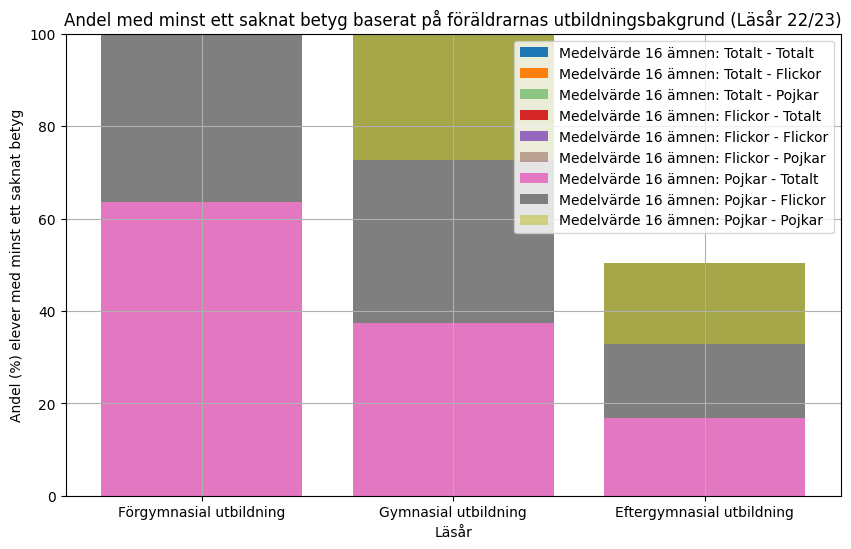

In [51]:

fig, ax = plt.subplots(figsize=(10, 6))

# Loopa genom varje utbildningsnivå
for education_level in ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"]:
    # Kontrollera om kolumnen finns
    if education_level in data_parents.columns:
        # Filtrera data baserat på den aktuella utbildningsnivån
        df_education_level = data_parents[data_parents[education_level].notna()]

        # Plotta linjegraf för varje Medelvärde 16 ämnen: Totalt
        ax.plot(df_education_level["Läsår"], df_education_level["% Som saknar godkänt: Totalt"],
                label=f'{education_level} - Totalt', marker='o')

# Beräknar antal elever som saknar godkänt och slutbetyg, samma som ovan
Total = (data_1B["Medelvärde 16 ämnen: Totalt"])
Girls = (data_1B["Medelvärde 16 ämnen: Flickor"])
Boys = (data_1B["Medelvärde 16 ämnen: Pojkar"])


# Loopa genom varje utbildningsnivå
for education_level in ["Medelvärde 16 ämnen: Totalt", "Medelvärde 16 ämnen: Flickor", "Medelvärde 16 ämnen: Pojkar"]:
    # Filtrera data baserat på den aktuella utbildningsnivån
    df_education_level = data_parents[data_parents[education_level].notna()]
    # Plotta stapeldiagram för den aktuella utbildningsnivån
    ax.bar(df_education_level["Läsår"], df_education_level["% Som saknar godkänt: Totalt"], label=f'{education_level} - Totalt')
    ax.bar(df_education_level["Läsår"], df_education_level["% Som saknar godkänt: Flickor"], bottom=df_education_level["% Som saknar godkänt: Totalt"], label=f'{education_level} - Flickor')
    ax.bar(df_education_level["Läsår"], df_education_level["% Som saknar godkänt: Pojkar"], bottom=df_education_level["% Som saknar godkänt: Flickor"] + df_education_level["% Som saknar godkänt: Totalt"], label=f'{education_level} - Pojkar', alpha=0.5)

'''
# Ritar linjediagramet med punkter som markerar varje år
plt.plot(years, Total, label="Totalt", marker="d", ms=8, ls="--")
plt.plot(years, Girls, label="Flickor", marker="d", ls="--")
plt.plot(years, Boys, label="Pojkar", marker="d", ls="--")'''

ax.set_title('Andel med minst ett saknat betyg baserat på föräldrarnas utbildningsbakgrund (Läsår 22/23)')
ax.set_xlabel('Läsår')
ax.set_ylabel('Andel (%) elever med minst ett saknat betyg')
ax.legend()
ax.set_ylim([0, 100])  # Justera y-axel för tydlighet
plt.grid(True)
plt.show()


In [13]:
print(data_parents.columns)


Index(['Läsår', 'Medelvärde 16 ämnen: Totalt', 'Medelvärde 16 ämnen: Flickor',
       'Medelvärde 16 ämnen: Pojkar', 'Medelvärde 17 ämnen: Totalt',
       'Medelvärde 17 ämnen: Flickor', 'Medelvärde 17 ämnen: Pojkar',
       '% Som saknar godkänt: Totalt', '% Som saknar godkänt: Flickor',
       '% Som saknar godkänt: Pojkar'],
      dtype='object')


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Läs in data från Excel-filen
df = pd.read_excel("din_excel_fil.xlsx", sheet_name="Din_sheet")

# Skapa linjediagram för andel saknade betyg
fig, ax = plt.subplots(figsize=(10, 6))

for education_level in ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"]:
    df_filtered = df[df["Föräldrarnas högsta utbildning2"] == education_level]
    ax.plot(df_filtered["Läsår"], df_filtered["Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen"], label=education_level)

ax.set_title('Andel elever med minst ett saknat betyg baserat på föräldrarnas utbildningsbakgrund')
ax.set_xlabel('Läsår')
ax.set_ylabel('Andel (%) elever')
ax.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'din_excel_fil.xlsx'